In [339]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [363]:
#Dynamics 
def new_state(x, u):
    return x-u

#Cost function:
def revenue(pt, u):
    return pt*u

    
def generate_demand_curve(p, N_states,  degree=1):
    #We se tthe curve such that at £25 we have a demand which is 30% of total capacity, when degree =1
    return [(N_states*0.3*25)*((1/price)**degree)+1   for price in p]
    

def generate_prices(N_steps, min_price, max_price):
    
    P = np.random.uniform(low=min_price, high= max_price, size=N_steps)
    P = list(P)
    P.sort()
    return P
    
    

def check_constraint(x,u):
    if ((u <= x) & (u>=0)):
        return True
    else:
        return False
    

    
    
def run_dp(N_steps, N_states, min_price, max_price):
    
    #This generate a vector of probabilities of having k in [0,N_states] bookings for class n in [0, N_classes], p(N_classes) << p(0)
    #D = generate_demands(N_steps, N_states)
    #k = [i for i in range(N_states)]
    #return [int(m) for m in [np.dot(d,k) for d in D]]
    
    P = generate_prices(N_steps, min_price, max_price)
    D = generate_demand_curve(P, N_states, degree=1)

    J = np.zeros((N_steps, N_states) ) #Cost 
    J[:]= np.nan
    U = np.zeros((N_steps, N_states) ) #Optimal move
    U[:] = np.nan
                          
    
    for t in reversed(range(N_steps)):
        
        p = P[t]
        exp_d = int(D[t]) #expected demand, floored to the closest integer
        #exp_d = int(np.dot(d, k)) #expected demand, floored to the closest integer
        print(f'Expected demand at this stage is {exp_d} for price {p}')
        N_controls = min(exp_d, N_states)
        
        J_local = np.zeros((N_controls, N_states))
        J_local[:] = np.nan
                    
                          
        for x in range(N_states):
             for u in range(N_controls):
                if (t==N_steps -1):
                    J_local[u][x] = p*min(u,x)
                else:
                    if check_constraint(x,u):
                        J_local[u][x] = p*u + J[t+1][new_state(x,u)]
              
       
        #print(J_local)
        J[t] = np.nanmax(J_local, axis=0)
        
        U[t] = np.nanargmax(J_local, axis=0)
   
        #print('-'*30)
        
        
    return J, U, P              
                        
            
                            
                    
                
def construct_optimal_trajectory(J, U):
    N_steps, N_states  = J.shape
    x = N_states-1 #Start with aircraft empty
    start = J[0][x]
    opt_control = []
    for t in range(N_steps):
        u = int(U[t][x])
        opt_control.append(u)
        x = new_state(x,u)
        
        
    return opt_control
    
    
        
    
    
    

In [385]:
N_steps = 10
N_states = 156+1
min_price = 25
max_price = 400


J, U = run_dp(N_steps, N_states, min_price, max_price)

Expected demand at this stage is 4 for price 341.8286076012876
Expected demand at this stage is 4 for price 330.97488514723295
Expected demand at this stage is 6 for price 207.5181413405632
Expected demand at this stage is 7 for price 174.0378362243275
Expected demand at this stage is 7 for price 170.6898732863003
Expected demand at this stage is 8 for price 162.36657583429468
Expected demand at this stage is 9 for price 132.7035524601605
Expected demand at this stage is 10 for price 117.9351641893118
Expected demand at this stage is 13 for price 95.3729954199502
Expected demand at this stage is 17 for price 72.17033363509657


In [423]:
def DV(j,x):
    return J[j][x]-J[j][x-1]

In [426]:
DV(0,56)

95.3729954199498

In [441]:
construct_optimal_trajectory(J,U)

[16, 12, 9, 8, 7, 6, 6, 5, 3, 3]

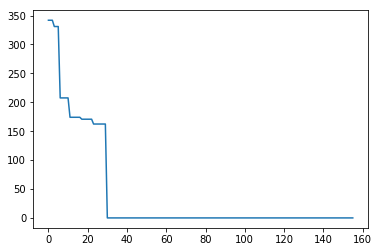

In [443]:
plt.plot([DV(4,x) for x in range(1,N_states)])
plt.plot(50)

In [399]:
sell = [x for x in reversed(list(np.cumsum(construct_optimal_trajectory(J,U))))]
time = [t for t in range(N_steps)]

In [444]:
sell

[75, 72, 69, 64, 58, 52, 45, 37, 28, 16]

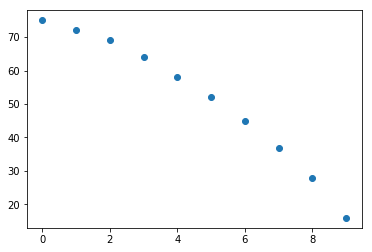

In [412]:
plt.scatter(x=time, y=sell)


In [ ]:


def generate_demands(N_steps, N_states):
    
    vector_of_demands = [0]*N_steps
    flag_M = 0
    
    max_index = 0
    min_index = 0
    
    p = []
    idx = []
    
    k = [i for i in range(N_states)]
    
    while flag_M < N_steps:
        #print(vector_of_demands)
        R = np.random.rand(N_states)
        R = R/R.sum()
        M = np.dot(R,k)
        if M not in idx:
            idx.append(M)
            p.append(R)
            flag_M +=1
        
    
    #Sort demands, such that the latest (lowest price) is associated to the largest expectation
    df = pd.DataFrame([idx,p]).T
    D = df.sort_values(0, ascending=False)[1].values
            
    return list(D)
    